In [1]:
import torch
import torch.utils.data as data
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import torch.optim as optim
import os

In [2]:
# data_transform = {
#     'female': transforms.Compose([
#         transforms.RandomResizedCrop(300),
#         transforms.RandomHorizontalFlip(),
#         transforms.ToTensor(),
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
#     ]),
#     'male': transforms.Compose([
#         transforms.Resize(300),
#         transforms.CenterCrop(300),
#         transforms.ToTensor(),
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
#     ])
# }
data_dir = "./data/Image/Image/C2015"
num_class = 2
batch_size = 8
num_epoch = 10
data_transform = {
    'female': transforms.Compose([
        transforms.Resize(100),
        transforms.CenterCrop(100),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'male': transforms.Compose([
        transforms.Resize(100),
        transforms.CenterCrop(100),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}


image_datasets = {
    x: datasets.ImageFolder(
        "D:\DevelopGit\jupyter\data\Image\Image\C2015",
        transform=data_transform[x]) for x in [
        'female',
        'male']}
data_loader = {
    x: data.DataLoader(
        image_datasets[x],
        batch_size=64,
        shuffle=True) for x in [
            'female',
        'male']}

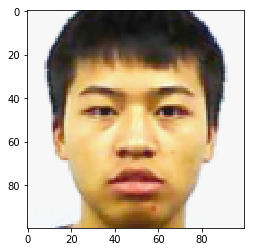

In [3]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated    
    
    
for data in data_loader['female']:
    imshow(data[0][0])
    break

$$\log [P_G(x;θ)] = \approx \arg \max\limits_{θ} E_{x \sim P_{data}(x)}\log [P_G(x;θ)]$$

In [4]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder,self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(3,8,kernel_size=5), # 128 - f + 2p +1 = 124
            nn.ReLU(),
            nn.MaxPool2d(2,2), # 62
            
            nn.Conv2d(8,15,kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(2,2), # 22
            
            nn.Conv2d(15,5,kernel_size=5), # 18
            nn.ReLU(),
            nn.MaxPool2d(2,2), # 9
        )
    
    def forward(self,x):
        in_size = x.size(0)
        x = self.main(x)
        x = x.view(in_size,-1)
        return x

In [5]:
encoder = Encoder()

$$H_{output} = (H_{input} - 1) * stride + H_{kernel} - 2 *padding$$
torch.nn.ConvTranspose2d(input=100, output=8, kernel_size = (4, 4), stride=1, padding=0)
2. 数学表达

In [6]:
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder,self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(405, 8, 5, 1, 0, bias=False),
            nn.BatchNorm2d(8),
            nn.ReLU(True), #(1 - 1) * 1 + 5 - 2 * 0 = 5
            
            nn.ConvTranspose2d(8, 4, 10, 10, 0, bias=False),
            nn.BatchNorm2d(4),
            nn.ReLU(True), #（5-1）* 8 + 10 = 50
    
            nn.ConvTranspose2d(4, 3, 2, 2, 0, bias=False),
            nn.Tanh()#（50-1）* 2 + 2  = 30
        )
    
    def forward(self,x):
        in_size = x.size(0)
        x = self.main(x)
        
        x.view(in_size,3,100,100)
        return x        

In [7]:
EPOCH = 1
temp = None
for epoch in range(EPOCH):
    for data in data_loader['female']:
        temp = data[0]
        break

data = temp[0].view(1,3,100,100)

In [8]:
encoder = Encoder()
decoder = Decoder()

In [9]:
optim = torch.optim.Adam(
    list(list(encoder.parameters()) + list(decoder.parameters()))
    ,lr=0.01)

In [10]:
for i in range(10000):
    output = decoder(encoder(data).view(1,405,1,1))
    
    optim.zero_grad()
    loss = torch.sum(torch.abs(data-output))
    loss.backward()
    optim.step()
    
    if i % 100 == 0:
        print("Loss :" + str(loss.item()))
    

Loss :25451.61328125
Loss :10355.2314453125
Loss :8170.48486328125
Loss :7872.501953125
Loss :7738.9521484375
Loss :7670.00341796875
Loss :7628.390625
Loss :7588.703125
Loss :7563.703125
Loss :7522.1142578125
Loss :7505.32666015625
Loss :7477.03564453125
Loss :7467.15673828125
Loss :7460.5126953125
Loss :7446.5771484375
Loss :7440.04638671875
Loss :7427.87939453125
Loss :7402.16015625
Loss :7396.53564453125
Loss :7397.78515625
Loss :7393.359375
Loss :7382.6455078125
Loss :7380.40576171875
Loss :7376.08154296875
Loss :7378.11474609375
Loss :7370.064453125
Loss :7370.435546875
Loss :7367.02880859375
Loss :7363.56396484375
Loss :7363.9208984375
Loss :7364.755859375
Loss :7362.9267578125
Loss :7365.01904296875
Loss :7352.08447265625
Loss :7356.85205078125
Loss :7349.74072265625
Loss :7352.55126953125
Loss :7355.04296875
Loss :7350.32958984375
Loss :7352.62548828125
Loss :7347.2548828125
Loss :7346.3173828125
Loss :7347.28173828125
Loss :7344.072265625
Loss :7341.45947265625
Loss :7338.7958

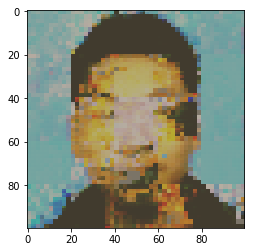

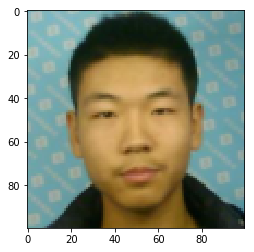

In [27]:
output = decoder(torch.randn(1,405,1,1))
imshow(output[0].detach())
imshow(data[0])

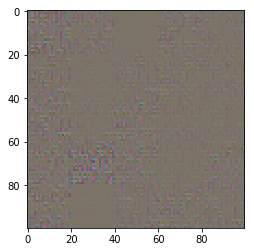

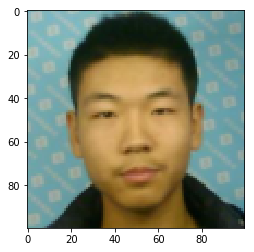

In [12]:
encoders = Encoder()
decoders = Decoder()
output = decoders(encoders(data).view(1,405,1,1))
imshow(output[0].detach())
imshow(data[0])